#  IN4050 Mandatory Assignment 1: Traveling Salesman Problem


## Rules
Before you begin the exercise, review the rules at this website:
https://www.uio.no/english/studies/examinations/compulsory-activities/mn-ifi-mandatory.html
(This is an individual assignment. You are not allowed to deliver together or copy/share source-code/answers
with others.)

Especially, notice that you are **not allowed to use code or parts of code written by others** in your submission. We do check your code against online repositories, so please be sure to **write all the code yourself**. Any use of **auto-generated code** must be clearly identified, along with the tool or software used to generate it. Read also the "Routines for handling suspicion of cheating and attempted cheating at the University of Oslo": https://www.uio.no/english/studies/examinations/cheating/index.html By submitting this assignment, you confirm that you are familiar with the rules and the consequences of breaking them.

### Delivery

**Deadline**: Tuesday, October 8 2024, 23:59

Your submission should be delivered in Devilry. You may redeliver in Devilry before the deadline, but include all files in the last delivery, as only the last delivery will be read. You are recommended to upload preliminary versions hours (or days) before the final deadline.

## What to deliver?

Deliver one single zipped folder (.zip, .tgz or .tar.gz) which includes:
* PDF report containing:
    * Your name and username (!)
    * Instructions on how to run your program, with example runs.
    * Answers to all questions from assignment.
    * Brief explanation of what you’ve done.
    * *Your PDF may be generated by exporting your Jupyter Notebook to PDF, if you have answered all questions in your notebook*
* Source code
    * Source code may be delivered as jupyter notebooks or python files (.py)
* The european cities file so the program will run right away.
* Any files needed for the group teacher to easily run your program on IFI linux machines.

**Important**: 
* Include example runs of your code by doing the reports described in the tasks. Simply implementing the code, but never running it will not give many points.
* Include the code that was used to make all reports. Do not include reports of performance and time without also including the code that was used to produce it.
* If you weren’t able to finish the assignment, use the PDF report to elaborate on what you’ve tried
and what problems you encountered. Students who have made an effort and attempted all parts of the assignment
will get a second chance even if they fail initially. This exercise will be graded PASS/FAIL.

## Introduction
In this exercise, you will attempt to solve an instance of the traveling salesman problem (TSP) using different
methods. The goal is to become familiar with evolutionary algorithms and to appreciate their effectiveness on a
difficult search problem. You have to use Python to solve the assignment. You must write
your program from scratch (but you may use non-EA-related libraries).


|  &nbsp;   | Barcelona | Belgrade |  Berlin | Brussels | Bucharest | Budapest |
|:---------:|:---------:|:--------:|:-------:|:--------:|:---------:|:--------:|
| Barcelona |     0     |  1528.13 | 1497.61 |  1062.89 |  1968.42  |  1498.79 |
|  Belgrade |  1528.13  |     0    |  999.25 |  1372.59 |   447.34  |  316.41  |
|   Berlin  |  1497.61  |  999.25  |    0    |  651.62  |  1293.40  |  1293.40 |
|  Brussels |  1062.89  |  1372.59 |  651.62 |     0    |  1769.69  |  1131.52 |
| Bucharest |  1968.42  |  447.34  | 1293.40 |  1769.69 |     0     |  639.77  |
|  Budapest |  1498.79  |  316.41  | 1293.40 |  1131.52 |   639.77  |     0    |


<center>Figure 1: First 6 cities from csv file.</center>


## Problem
The traveling salesman, wishing to disturb the residents of the major cities in some region of the world in
the shortest time possible, is faced with the problem of finding the shortest tour among the cities. A tour
is a path that starts in one city, visits all of the other cities, and then returns to the starting point. The
relevant pieces of information, then, are the cities and the distances between them. In this instance of the
TSP, a number of European cities are to be visited. Their relative distances are given in the data file, *european_cities.csv*, found in the zip file with the mandatory assignment.

(You will use permutations to represent tours in your programs. The **itertools** module in Python provides
a permutations function that returns successive permutations, this is useful for exhaustive search)

## Helper code for visualizing solutions

Here follows some helper code that you can use to visualize the plans you generate. These visualizations can **help you check if you are making sensible tours or not**. The optimization algoritms below should hopefully find relatively nice looking tours, but perhaps with a few visible inefficiencies.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
np.random.seed(57)
#Map of Europe
europe_map = plt.imread('map.png')

#Lists of city coordinates
city_coords = {
    "Barcelona": [2.154007, 41.390205], "Belgrade": [20.46, 44.79], "Berlin": [13.40, 52.52], 
    "Brussels": [4.35, 50.85], "Bucharest": [26.10, 44.44], "Budapest": [19.04, 47.50],
    "Copenhagen": [12.57, 55.68], "Dublin": [-6.27, 53.35], "Hamburg": [9.99, 53.55], 
    "Istanbul": [28.98, 41.02], "Kyiv": [30.52, 50.45], "London": [-0.12, 51.51], 
    "Madrid": [-3.70, 40.42], "Milan": [9.19, 45.46], "Moscow": [37.62, 55.75],
    "Munich": [11.58, 48.14], "Paris": [2.35, 48.86], "Prague": [14.42, 50.07],
    "Rome": [12.50, 41.90], "Saint Petersburg": [30.31, 59.94], "Sofia": [23.32, 42.70],
    "Stockholm": [18.06, 60.33], "Vienna": [16.36, 48.21], "Warsaw": [21.02, 52.24]}


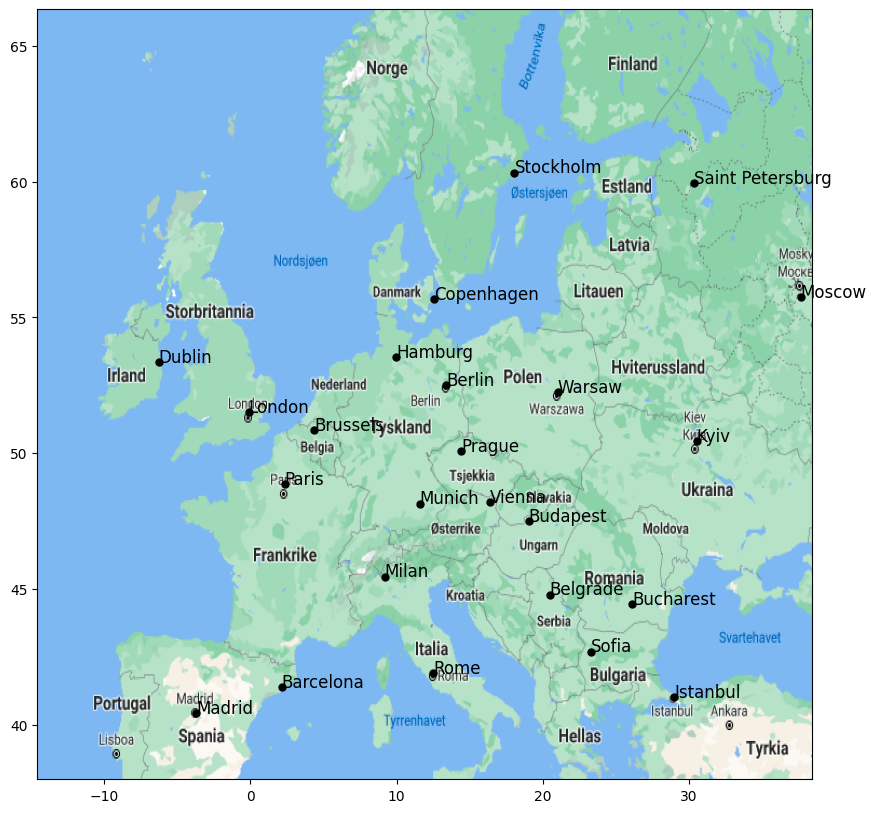

In [2]:
#Helper code for plotting plans
#First, visualizing the cities.
import csv
with open("european_cities.csv", "r") as f:
    data = list(csv.reader(f, delimiter=';'))
    cities = data[0]

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(europe_map, extent=[-14.56, 38.43, 37.697 + 0.3, 64.344 + 2.0], aspect="auto")

# Map (long, lat) to (x, y) for plotting
for city, location in city_coords.items():
    x, y = (location[0], location[1])
    plt.plot(x, y, 'ok', markersize=5)
    plt.text(x, y, city, fontsize=12)


In [3]:
#A method you can use to plot your plan on the map.
def plot_plan(city_order):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(europe_map, extent=[-14.56, 38.43, 37.697 + 0.3, 64.344 + 2.0], aspect="auto")

    # Map (long, lat) to (x, y) for plotting
    for index in range(len(city_order) - 1):
        current_city_coords = city_coords[city_order[index]]
        next_city_coords = city_coords[city_order[index+1]]
        x, y = current_city_coords[0], current_city_coords[1]
        #Plotting a line to the next city
        next_x, next_y = next_city_coords[0], next_city_coords[1]
        plt.plot([x, next_x], [y, next_y])

        plt.plot(x, y, 'ok', markersize=5)
        plt.text(x, y, index, fontsize=12)
    #Finally, plotting from last to first city
    first_city_coords = city_coords[city_order[0]]
    first_x, first_y = first_city_coords[0], first_city_coords[1]
    plt.plot([next_x, first_x], [next_y, first_y])
    #Plotting a marker and index for the final city
    plt.plot(next_x, next_y, 'ok', markersize=5)
    plt.text(next_x, next_y, index+1, fontsize=12)
    plt.show()


['Barcelona', 'Belgrade', 'Berlin', 'Brussels', 'Bucharest', 'Budapest', 'Copenhagen', 'Dublin', 'Hamburg', 'Istanbul', 'Kyiv', 'London', 'Madrid', 'Milan', 'Moscow', 'Munich', 'Paris', 'Prague', 'Rome', 'Saint Petersburg', 'Sofia', 'Stockholm', 'Vienna', 'Warsaw']


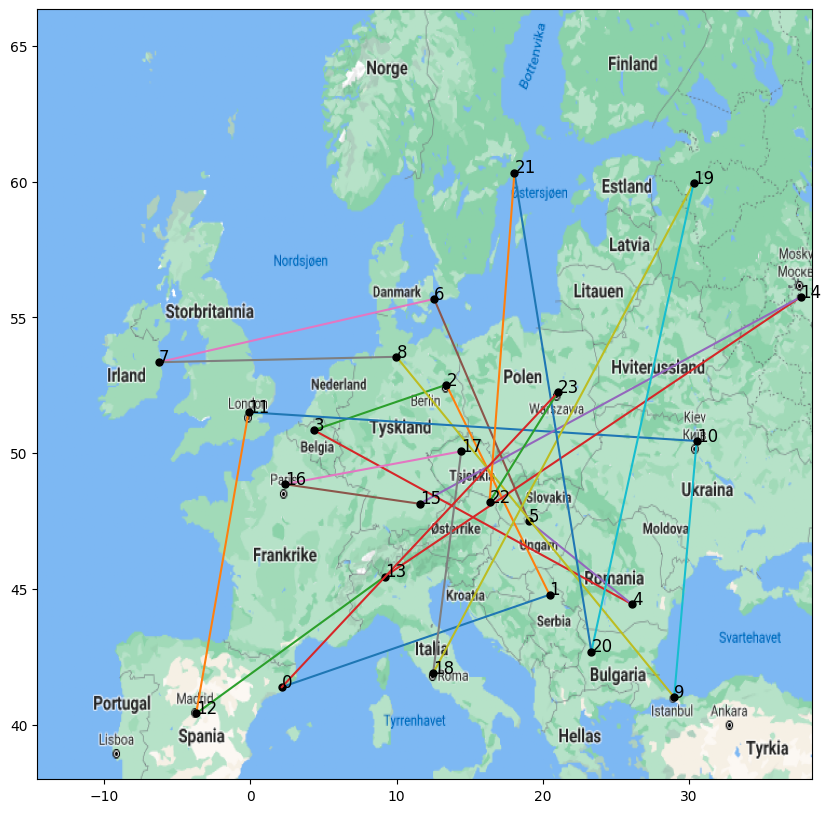

In [4]:
#Example usage of the plotting-method.
plan = list(city_coords.keys()) # Gives us the cities in alphabetic order
print(plan)
plot_plan(plan)

## Exhaustive Search
First, try to solve the problem by inspecting every possible tour. Start by writing a program to find the shortest
tour among a subset of the cities (say, **6** of them). Measure the amount of time your program takes. Incrementally
add more cities and observe how the time increases. Plot the shortest tours you found using the plot_plan method above, for 6 and 10 cities.

**Note:** To get distances between cities, use the dictionary `data` created by reading the file `european_cities.csv`. *Do not* calculate distances based on the coordinates. The actual distances do not only depend on the differences in the coordinates, but also of the curvature of the earth. The distances available in `data` are corrected for this, and contain the actual true distances.

In [5]:
import itertools

def distance(route):
    curr_dist = 0
    for i in range(len(route)-1):
        frst = cities.index(route[i])
        scnd = cities.index(route[i+1])
        curr_dist += float(data[frst+1][scnd])
    frst = cities.index(route[0])
    curr_dist += float(data[scnd+1][frst]) #distanse fra siste til startpunktet
    return curr_dist

#tar inn en liste med byer som skal sjekkes
def exhaustive_search(cities):
    possible_routes = itertools.permutations(cities)
    best_dist = 10**7
    best_route = ()

    for route in possible_routes:
        curr_dist = distance(route)
        if curr_dist <= best_dist:
            best_dist = curr_dist
            best_route = route

        curr_dist = 0

    print(best_route)
    plot_plan(best_route)



('Budapest', 'Bucharest', 'Belgrade', 'Barcelona', 'Brussels', 'Berlin')


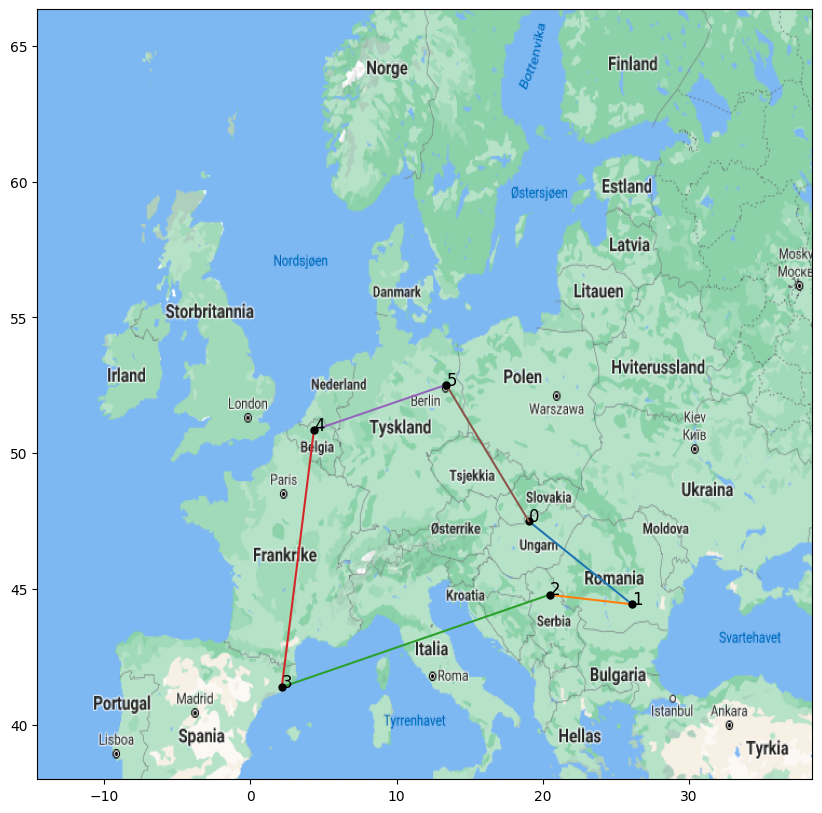

In [8]:
exhaustive_search(cities[:6])

('Copenhagen', 'Hamburg', 'Brussels', 'Dublin', 'Barcelona', 'Belgrade', 'Istanbul', 'Bucharest', 'Budapest', 'Berlin')


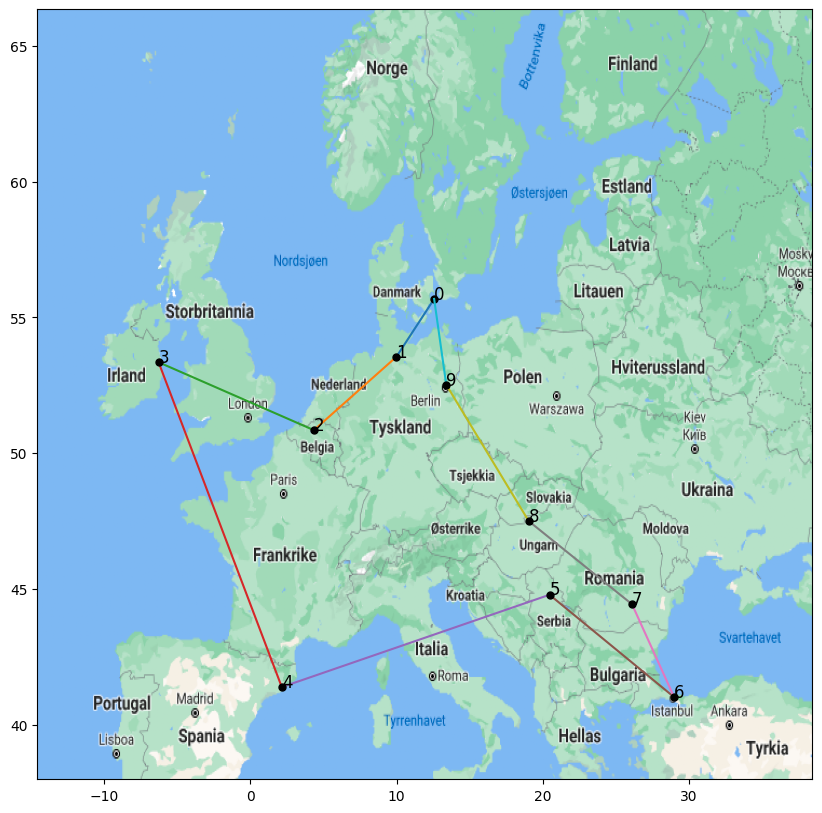

In [10]:
exhaustive_search(cities[:10])

What is the shortest tour (i.e., the actual sequence of cities, and its length) among the first 10 cities (that is,
the cities starting with B,C,D,H and I)? How long did your program take to find it? Calculate an approximation of how long it would take to perform exhaustive search on all 24 cities?

6 cities was only 0.2s, but my computer used 13.4 seconds on 10 cities.

The number of possible routes is cities factorial. So for 6 cities: 6! = 720 possible routes, and 10! = 3628800 possible routes!

(Itertools.permutation which I've used in this assignment gives us factorial routes, but in reality is is a bit less, because we dont care about the direction of the routes, and what city we start/stop in since it is a circular route. In reality it would be (p-1)!/2 possible routes.)


In [18]:
import math
#10 cities: 13.4 

t = 13.4 / math.factorial(10) #seconds per route with 10 cities

years = math.factorial(24)*(t) / 60/  60 / 24 /365 #how many years to do exhaustive search for 24 cities

print(f"If we did exhaustive search on all 24 cities, it would take {years:.0f} years.")



If we did exhaustive search on all 24 cities, it would take 72650871562 years.


So, for this p! implementation, exhaustive search for 24 cities is obviously not feasible.

## Hill Climbing
Then, write a simple hill climber to solve the TSP. How well does the hill climber perform, compared to the result from the exhaustive search for the first **10 cities**? Since you are dealing with a stochastic algorithm, you
should run the algorithm several times to measure its performance. Report the length of the tour of the best,
worst and mean of 20 runs (with random starting tours), as well as the standard deviation of the runs, both with the **10 first cities**, and with all **24 cities**. Plot one of the the plans from the 20 runs for both 10 cities and 24 cities (you can use plot_plan). 

In [20]:
import random

random.seed(42)


def swap(cities, i, j):
    copy = cities.copy()
    copy[i], copy[j] = copy[j], copy[i]
    return copy

def generate_neighbors (cities):
    tours = []
    for i in range(len(cities)):
        for j in range(i + 1, len(cities)):
            tours.append(swap(cities, i, j))

    return tours

def hill_climbing(curr_tour):
    
    #max iterations:
    N = 300


    curr_dist = distance(curr_tour)

    for i in range(N):
        distances = {}
        neighbourhood = generate_neighbors(curr_tour)
        for neighbor in neighbourhood:
            dist = distance(neighbor)
            distances[dist] = neighbor
        best_dist = min(distances)
        best_neighbor = distances[best_dist]
        if best_dist > curr_dist:
            return curr_tour, best_dist
        curr_tour = best_neighbor
        curr_dist = best_dist

    return curr_tour, best_dist

def do_hill_climb(cities):
    #generate random start tour curr_tour
    curr_tour = cities.copy()
    np.random.shuffle(curr_tour)
    return hill_climbing(curr_tour)


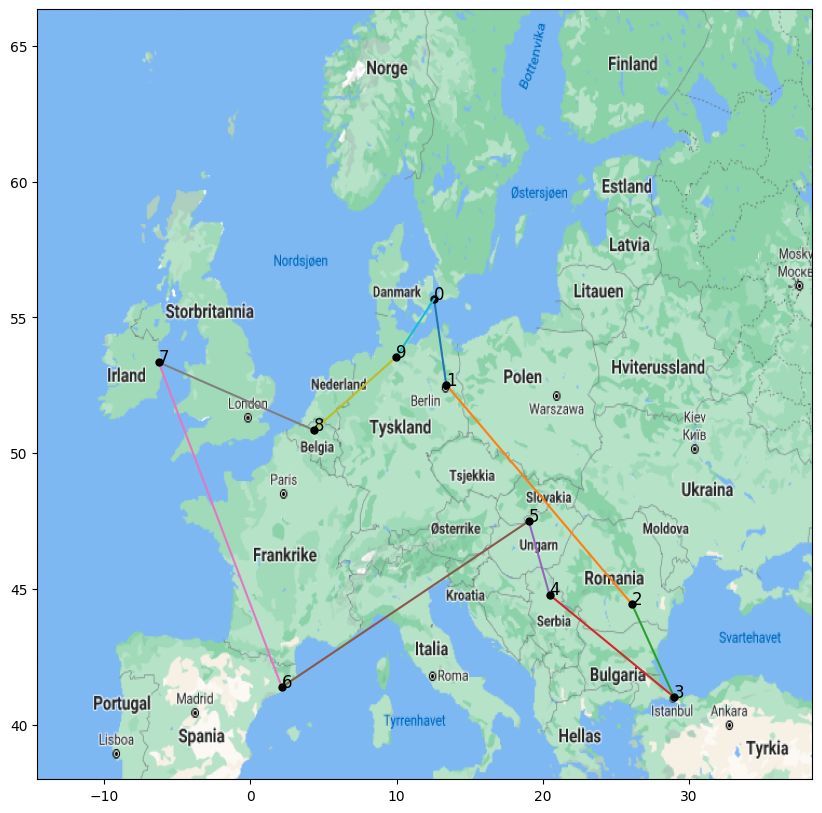

In [21]:
(route, dist) = do_hill_climb(cities[:10])
plot_plan(route)

For the first 10 cities, the hill climb approach gives the same route as exhaustive search

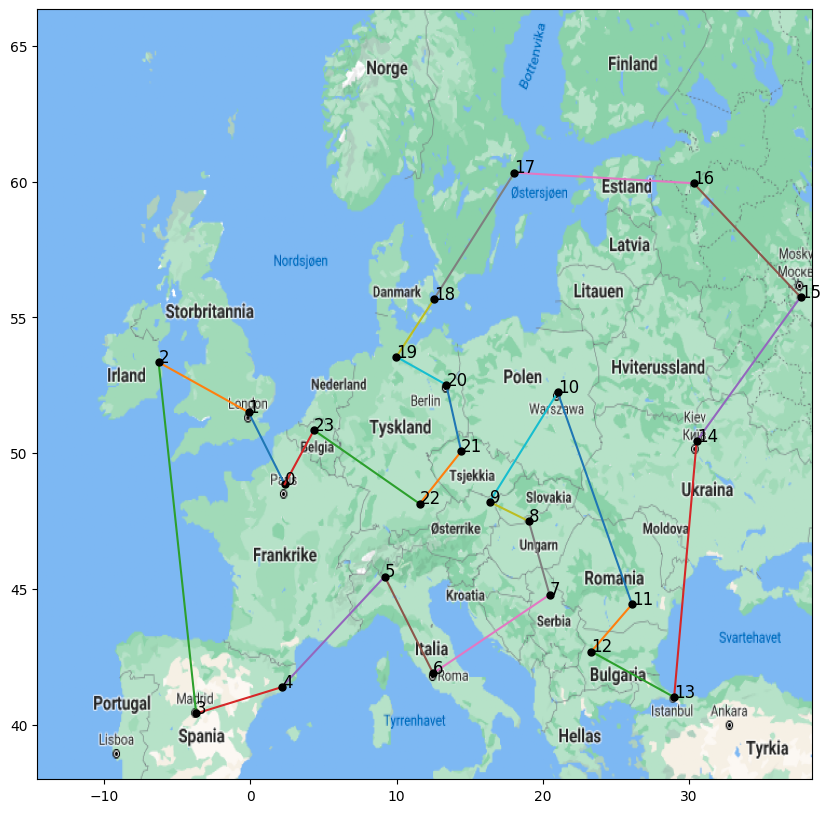

In [9]:
route, dist = do_hill_climb(cities)
plot_plan(route)

This route for 24 cities seems reasonable, as we sort of have a "sircle" 

In [22]:
#20 times
import statistics

def run_multiples(cities):
    dists = []
    for i in range(20):
        (route, dist) = do_hill_climb(cities)
        dists.append(dist)

    return max(dists), min(dists), statistics.mean(dists), statistics.stdev(dists)
    #best, worst, mean, sd
print(run_multiples(cities[:10]))
print(run_multiples(cities))
    


(8426.0, 7549.16, 7647.502, 206.86194306958998)
(16476.230000000003, 12694.7, 14456.0295, 1025.7653742679686)


For 10 cities:

Worst run: 8426.0

Best run: 7549.16

Mean: 7647.502

Standard deviasion : 206.86

For all cities:

Worst run: 16476.23

Best run:  12694.7

Mean: 14456.0295

Standard deviasion : 1025.77

More variance in the runs for all the cities, but it makes sense at it is a bigger difference between worst and best run, and we are dealing with higher number of routes

## Genetic Algorithm
Next, write a genetic algorithm (GA) to solve the problem. Choose mutation and crossover operators that are appropriate for the problem (see chapter 4.5 of the Eiben and Smith textbook). Choose three different values for the population size. Define and tune other parameters yourself and make assumptions as necessary (and report them, of course).

For all three variants: As with the hill climber, report best, worst, mean and standard deviation of tour length out of 20 runs of the algorithm (of the best individual of last generation). Also, find and plot the average fitness of the best fit individual in each generation (average across runs), and include a figure with all three curves in the same plot in the report. This means that the x-axis should be the generations over time and the y-axis should be the average (over the 20-runs) fitness of the best gene in that generation. Conclude which is best in terms of tour length and number of generations of evolution time.

Finally, plot an example optimized tour (the best of the final generation) for the three different population sizes, using the plot_plan method.

In [23]:
def gen_init(cities, p):
    init = []
    for _ in range(p):
        cities_copy = cities.copy()
        np.random.shuffle(cities_copy)
        init.append(cities_copy)
    return init


#These two are copied from solutions to exersises given in the course
# https://www.uio.no/studier/emner/matnat/ifi/INF3490/h16/exercises/inf3490-sol2.pdf
def pmx(a,b, start, stop):
    child = [None]*len(a)
    # Copy a slice from first parent:
    child[start:stop] = a[start:stop]
    # Map the same slice in parent b to child using indices from parent a:
    for ind,x in enumerate(b[start:stop]):
        ind += start
        if x not in child:
            while child[ind] != None:
                ind = b.index(a[ind])
            child[ind] = x
    # Copy over the rest from parent b
    for ind,x in enumerate(child):
        if x == None:
            child[ind] = b[ind]
    return child

def pmx_pair(a,b):
    half = len(a) // 2
    start = np.random.randint(0, len(a)-half)
    stop = start + half
    return pmx(a,b,start,stop) , pmx(b,a,start,stop)

def inversion_mutation(a):
    start = np.random.randint(0, len(a)-1)
    end = np.random.randint(start, len(a))

    middle = a[start:end]
    middle.reverse()

    return a[:start] + middle + a[end:]


def genetic_algorithm(cities, pop_size, generations):

    best_in_gen = []
    best_route, best_dist = [], 10**5
    pop = gen_init(cities, pop_size)

    for gen in range(generations):
        dist_route = []
        for route in pop:
            dist = distance(route)
            dist_route.append([dist, route])
        dist_route.sort()

        if dist_route[0][0] < best_dist:
            best_dist, best_route = dist_route[0][0], dist_route[0][1]


        #choose parents. high probability of choosing best fitted
        dists, routes = zip(*dist_route)
        dists = np.array(dists)

        choices = np.random.choice(len(routes), pop_size//2, 
                          p = 1/dists * 1/sum(1/dists)) 
        
        parents = [routes[i] for i in choices]
        

        best_in_gen.append(dist_route[0][0])

        #crossover
        pop = []
        for i in range (len(parents)-1):
            a,b = pmx_pair(parents[i], parents[i+1])
            pop.append(a)
            pop.append(b)
        a,b = pmx_pair(parents[0], parents[-1])
        pop.append(a)
        pop.append(b)



        #mutation
        pop = [inversion_mutation(route) if np.random.random()<=0.3 else route for route in pop] #mutates about 30% of pop

    return best_route, best_dist, best_in_gen



In [29]:
def run_multiples(cities):
    pop_sizes = [50,200,600]
    best_routes = []
    for pop_size in pop_sizes:
        dists = []
        bests = []
        dist_route = []

        for i in range(20):
            (route, dist, best_in_gen) = genetic_algorithm(cities, pop_size, 100) #100 generations each time
            dists.append(dist)
            bests.append(best_in_gen)
            dist_route.append([dist,route])
        
        dist_route.sort()
        best_routes.append(dist_route[0][1])
        

        average_list = [sum(x) / len(x) for x in zip(*bests)]
        plt.plot(average_list, label=pop_size)


   
    plt.legend(title = "Population size")
    plt.show()

    print(best_routes)
    plot_plan(best_routes[0])
    plot_plan(best_routes[1])
    plot_plan(best_routes[2])
    return max(dists), min(dists), statistics.mean(dists), statistics.stdev(dists)
    #wors, best, mean, sd



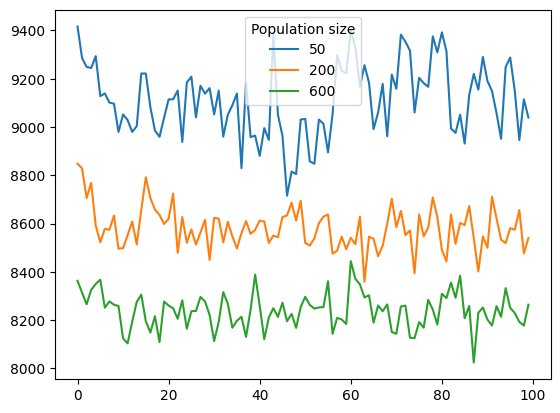

[['Copenhagen', 'Hamburg', 'Brussels', 'Dublin', 'Barcelona', 'Belgrade', 'Istanbul', 'Bucharest', 'Budapest', 'Berlin'], ['Dublin', 'Brussels', 'Hamburg', 'Copenhagen', 'Berlin', 'Budapest', 'Bucharest', 'Istanbul', 'Belgrade', 'Barcelona'], ['Barcelona', 'Belgrade', 'Istanbul', 'Bucharest', 'Budapest', 'Berlin', 'Copenhagen', 'Hamburg', 'Brussels', 'Dublin']]


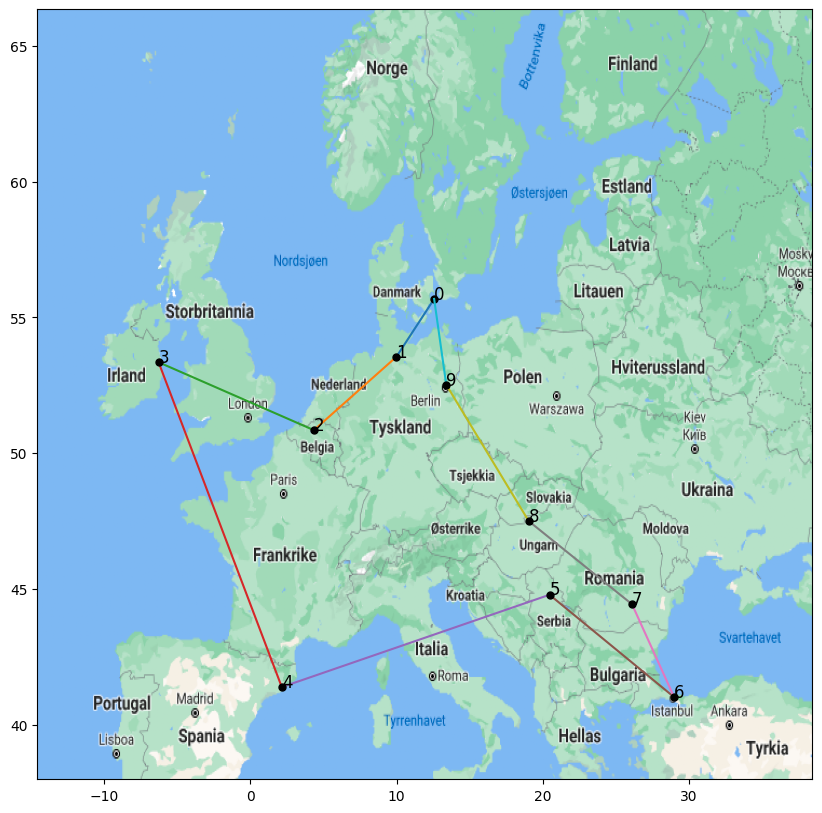

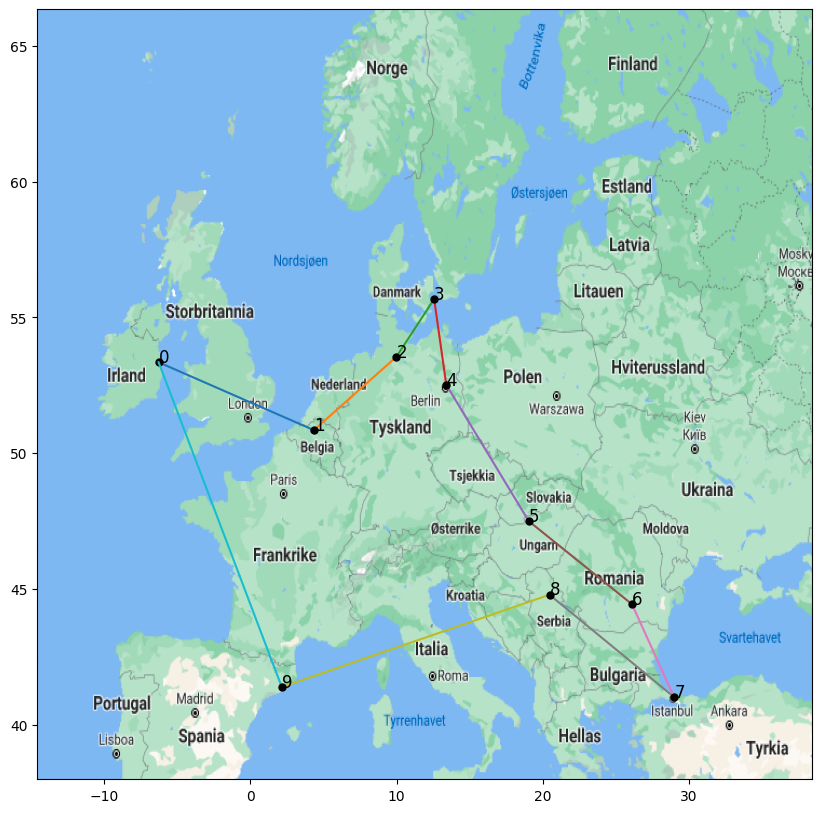

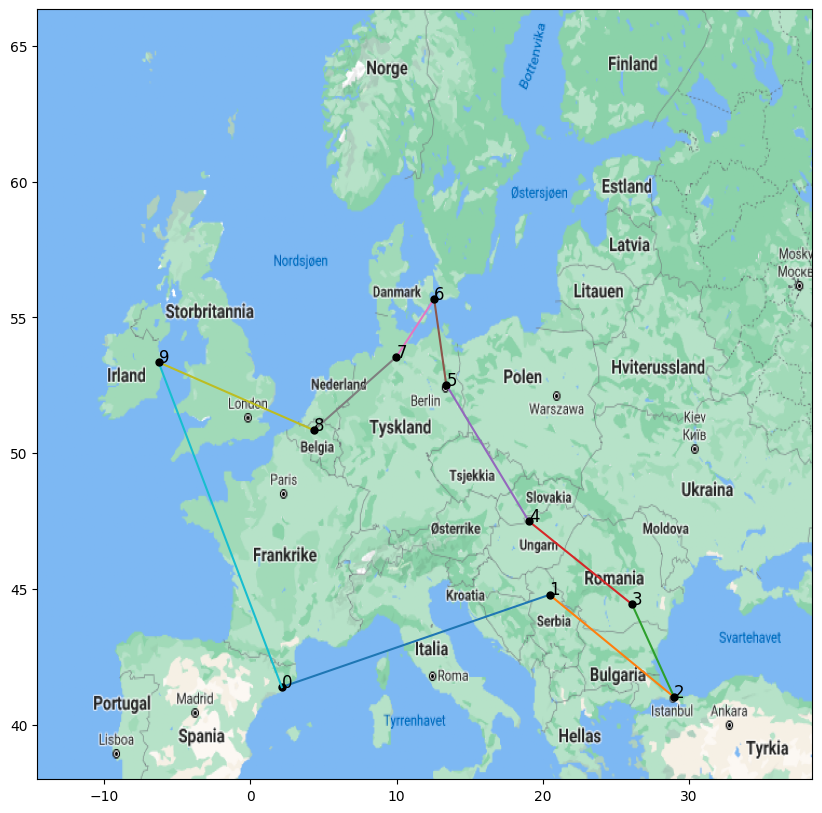

(7663.509999999999, 7486.3099999999995, 7509.196, 46.01980813793795)


In [30]:
print(run_multiples(cities[:10]))

With 50, 200 and 600 in population size, and 100 generations we get the same route as with exhaustive search and the hill climb algorithm.
We have smaller standard deviation, so the routes are more similar each run

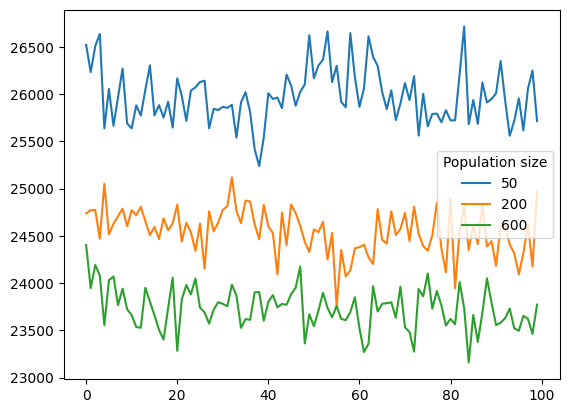

[['Dublin', 'Paris', 'Milan', 'Sofia', 'Bucharest', 'Warsaw', 'Prague', 'Kyiv', 'Berlin', 'Copenhagen', 'Stockholm', 'Hamburg', 'Vienna', 'Saint Petersburg', 'Moscow', 'Rome', 'Budapest', 'Belgrade', 'Istanbul', 'Munich', 'Barcelona', 'Madrid', 'London', 'Brussels'], ['Budapest', 'Rome', 'Milan', 'Vienna', 'Prague', 'Barcelona', 'Madrid', 'Paris', 'Munich', 'Belgrade', 'Sofia', 'Brussels', 'Istanbul', 'Bucharest', 'Kyiv', 'Hamburg', 'Copenhagen', 'Stockholm', 'Saint Petersburg', 'Moscow', 'Warsaw', 'Berlin', 'London', 'Dublin'], ['Berlin', 'Vienna', 'Milan', 'Munich', 'Prague', 'Saint Petersburg', 'Moscow', 'Kyiv', 'Sofia', 'Budapest', 'Rome', 'Madrid', 'Barcelona', 'Dublin', 'London', 'Paris', 'Stockholm', 'Brussels', 'Hamburg', 'Copenhagen', 'Bucharest', 'Belgrade', 'Istanbul', 'Warsaw']]


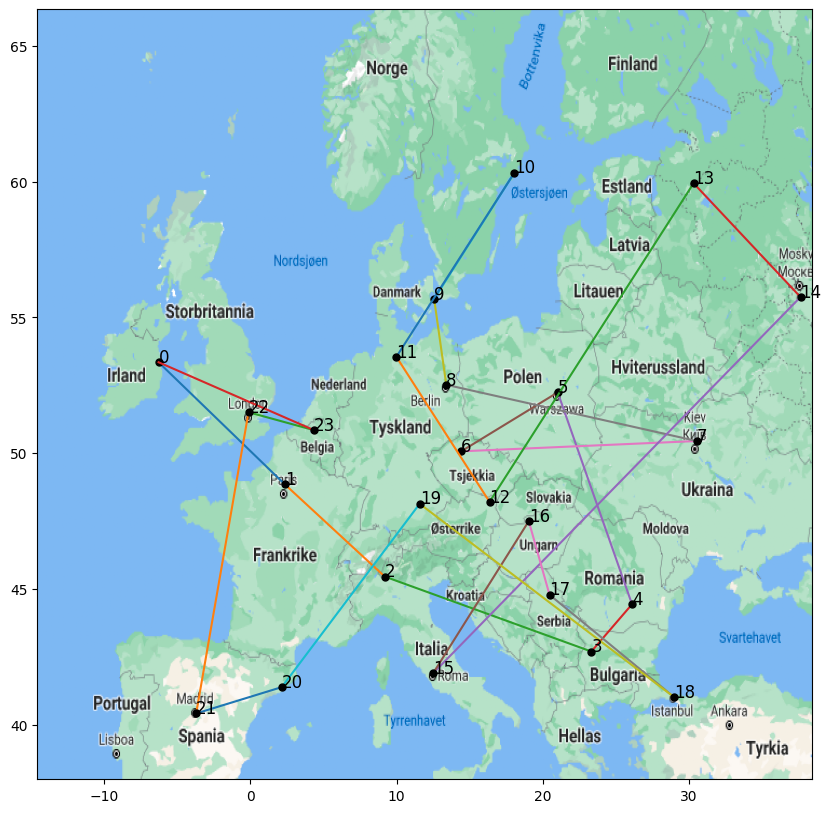

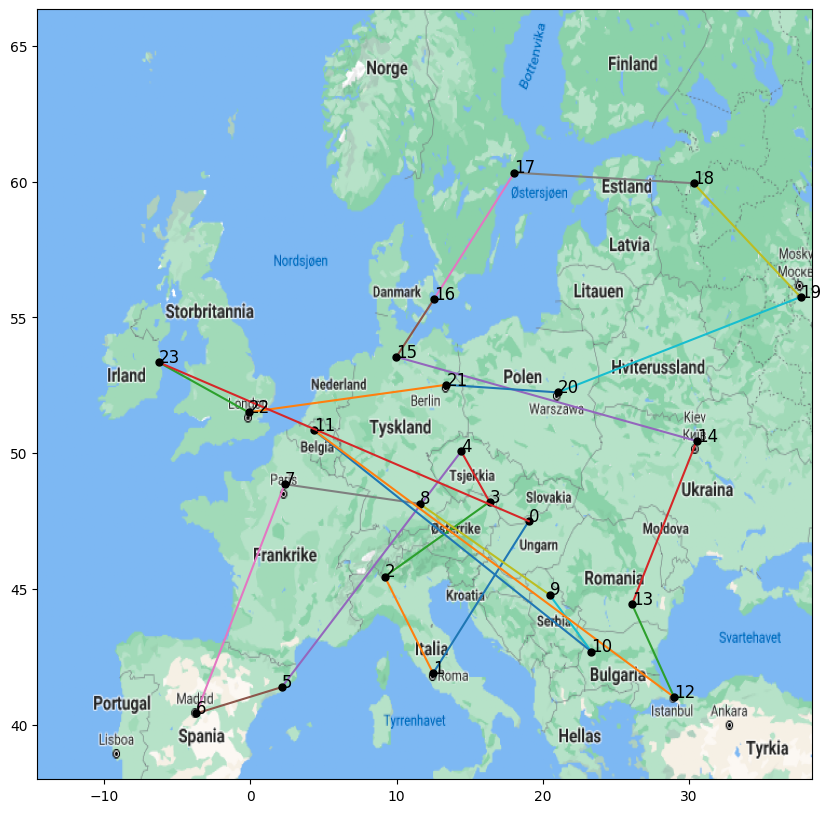

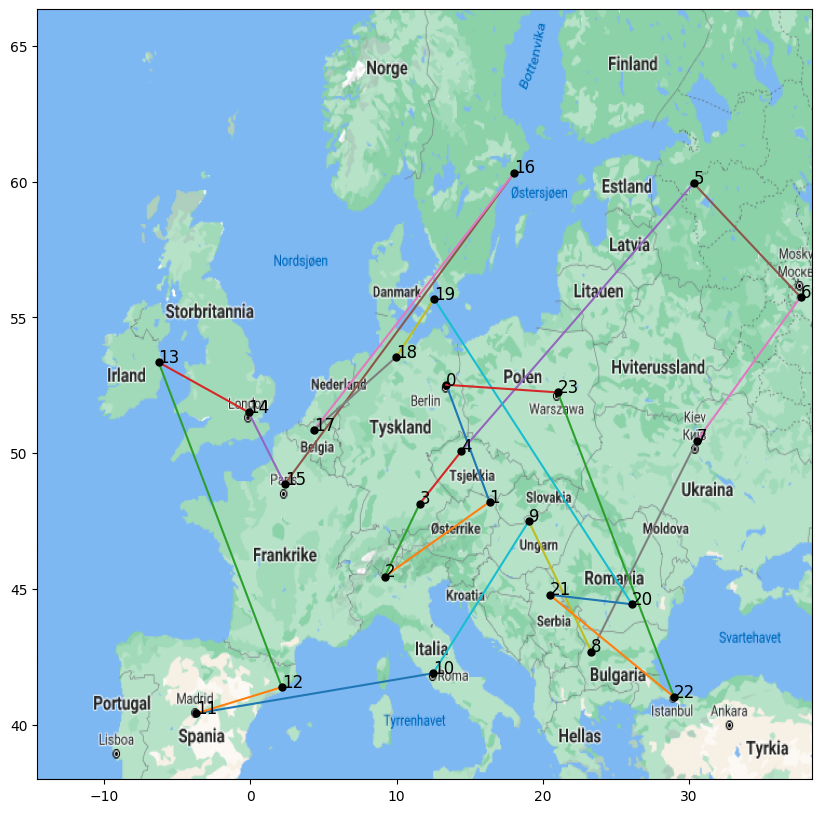

(22090.670000000002, 19592.27, 20962.127, 593.9518992583761)


In [31]:
print(run_multiples(cities))

The shortes route in the Hill Climb algorithm was 12694.7, so it found a shorter route than my GA. And by the plots these are clearly not optimal routes

Among the first 10 cities, did your GA find the shortest tour (as found by the exhaustive search)? Did it come close? 

For both 10 and 24 cities: How did the running time of your GA compare to that of the exhaustive search? 

How many tours were inspected by your GA as compared to by the exhaustive search?

10 cities: my GA found the shortes route.

The runtime was longer for both 10 and 24 cities.

Exhaustive search for 24 cities is 24!
In my GA we started with 50/200/600 routes and for 100 generations. So 5_000, 20_000 and 60_000 tours were inspected